In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [5]:
# import wget

# link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"
# wget.download(link)

In [6]:
import os
import pickle

base_dir = r"D:\Learning AI\AI-Learning-Project\Neural Networks\Convolution Neural Networks\trafic sign prediction\data"

def load_pickle(filename):
    with open(os.path.join(base_dir, filename), 'rb') as f:
        return pickle.load(f)

train = load_pickle("train.p")
valid = load_pickle("valid.p")
test = load_pickle("test.p")

In [7]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


In [8]:
trainX = train["features"]
trainY = train["labels"]
validX = valid["features"]
validY = valid["labels"]
testX = test["features"]
testY = test["labels"]

trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)
testY = lb.fit_transform(testY)

trainX, trainY = shuffle(trainX, trainY)

In [9]:
width = 32
height = 32
classes = 43
shape = (width, height, 3)

In [10]:
#CNN - VGG 16
model = Sequential()

# Input layer
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())

# Hidden Layers
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())

# Output Layers
model.add(Dense(classes))
model.add(Activation("softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [12]:
# generate more image
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

# specification trainning model
learning_rate = 0.01
epochs = 10
batch_size = 64

# optimizer : SGD: Sequence Gradient Descent
opt = SGD(learning_rate=learning_rate, momentum=0.9)

# compile model (optimizer, loss function, score)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
print("Start training")
H = model.fit(
    aug.flow(trainX, trainY, batch_size=batch_size), 
    validation_data=(validX, validY), 
    steps_per_epoch=trainX.shape[0]//batch_size, 
    epochs=epochs, 
    verbose=1)

Start training
Epoch 1/10
543/543 [==============================] - 90s 165ms/step - loss: 2.0709 - accuracy: 0.3986 - val_loss: 1.8248 - val_accuracy: 0.4596
Epoch 2/10
543/543 [==============================] - 49s 91ms/step - loss: 0.8800 - accuracy: 0.7091 - val_loss: 1.3385 - val_accuracy: 0.6263
Epoch 3/10
543/543 [==============================] - 58s 107ms/step - loss: 0.4236 - accuracy: 0.8629 - val_loss: 1.0483 - val_accuracy: 0.7063
Epoch 4/10
543/543 [==============================] - 118s 217ms/step - loss: 0.2358 - accuracy: 0.9240 - val_loss: 0.5789 - val_accuracy: 0.8392
Epoch 5/10
543/543 [==============================] - 54s 99ms/step - loss: 0.1521 - accuracy: 0.9510 - val_loss: 0.6986 - val_accuracy: 0.8234
Epoch 6/10
543/543 [==============================] - 53s 98ms/step - loss: 0.1133 - accuracy: 0.9631 - val_loss: 0.5868 - val_accuracy: 0.8426
Epoch 7/10
543/543 [==============================] - 54s 99ms/step - loss: 0.0881 - accuracy: 0.9733 - val_loss: 0.5

In [19]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


In [21]:
model.save("trafic_sign_predict")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: trafic_sign_predict\assets


In [22]:
saved_model = tf.keras.models.load_model("trafic_sign_predict")

result = saved_model.predict(testX[100:101])
final = np.argmax(result)
final = classNames[final]
final

'Speed limit (30km/h)'

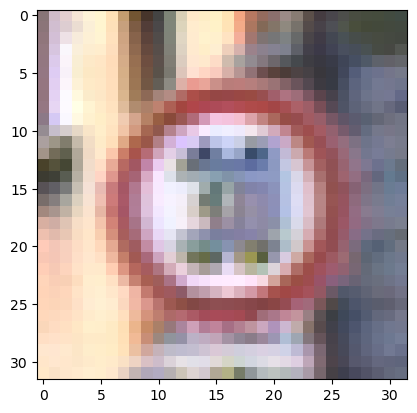

In [23]:
plt.imshow(test["features"][100])